In [3]:
import PyPDF2
import spacy
import networkx as nx
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
def extract_text_from_pdf(pdf_path):
    with open(pdf_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
    return text

In [36]:
def extract_entities(text):
    nlp = spacy.load("en_core_web_sm")  # Load pre-trained spaCy model
    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))
    return entities

In [37]:
def extract_relations(text):
    nlp = spacy.load("en_core_web_sm")
    
    # Add sentencizer to handle sentence segmentation
    nlp.add_pipe('sentencizer')
    
    doc = nlp(text)
    relations = []
    
    # Simple extraction of subject-verb-object (SVO) triples
    for sent in doc.sents:
        subj = None
        verb = None
        obj = None
        for token in sent:
            print(token)
            if 'subj' in token.dep_:
                subj = token
            if 'VERB' in token.pos_:
                verb = token
            if 'obj' in token.dep_:
                obj = token
        if subj and verb and obj:
            relations.append((subj.text, verb.text, obj.text))
    
    return relations

In [38]:
def build_graph(entities, relations):
    G = nx.Graph()
    
    # Add entities as nodes
    for entity, label in entities:
        G.add_node(entity, label=label)
    
    # Add relations as edges between entities
    for subj, verb, obj in relations:
        G.add_edge(subj, obj, relation=verb)
    
    return G

In [20]:
pdf_path = "./docs/GIÁO-TRÌNH-PHÂN-TÍCH-DỮ-LIỆU-KINH-DOANH.pdf"  # Change this to the path of your PDF

# Step 1: Extract text from PDF
text = extract_text_from_pdf(pdf_path)

In [32]:
entities = extract_entities(text)

In [39]:
relations = extract_relations(text)

   
 

ĐẠI
HỌC
QUỐC
GIA
THÀNH
PHỐ
HỒ
CHÍ
MINH


TRƯỜNG
ĐẠI
HỌC
CÔNG
NGHỆ
THÔNG
TIN

 

Nguyễn
Đình
Thuân
 
 
Nguyễn
Minh
Nhựt


Nguyễn
Thị
Viết
Hương


Trịnh
Thị
Thanh
Trúc

 
 
 

GIÁO
TRÌNH
 
 

PHÂN
TÍCH
DỮ
LIỆU
KINH
DOANH
 
 
 
 
 
 
 

2024
    

LỜI
NÓI
ĐẦU


Sự
phát
triển
của
Công
nghệ
thông
tin
và
trong
bối
cảnh
cách
mạng
công
nghiệp


4.0
,
dữ
liệu
được
tạo
ra
hàng
ngày
đang
gia
tăng
nhanh
chóng
.
Việc
tìm
kiếm


những
phương
pháp
và
công
cụ
tiên
tiến
nhất
để
khai
thác
tối
đa
giá
trị
từ
dữ


liệu
,
phân
tích
dữ
liệu
một
cách
hiệu
quả
sẽ
giúp
các
doanh
nghiệp
đưa
ra
những


quyết
định
sáng
suốt
và
dự
đoán
xu
hướng
tương
lai
.


Giáo
trình
Phân
tích
dữ
liệu
kinh
doanh
được
biên
soạn
dưới
góc
nhìn
của
những


người
làm
về
Công
nghệ
thông
tin
,
nhằm
trang
bị
cho
sinh
viên
những
kiến
thức


và
kỹ
năng
cần
thiết
về
thống
kê
,
thuật
toán
,
lập
trình
trong
lĩnh
vực
phân
tích


dữ
liệu
kinh
doanh
.
 

Giáo
trình
giới
thiệu
khái
niệm
cơ
bản
về
phân
tích
dữ
liệu
kinh
doanh
,
các
công


c

In [40]:
print(relations)

[('ra', 'quyết', 'liệu'), ('khái', 'niệm', 'biến'), ('bài', 'toán', 'Chương'), ('viên', 'dụng', 'code'), ('bài', 'toán', 'liệu'), ('đọc', 'giả', 'hơn'), ('tác', 'giả', 'Chương'), ('bài', 'toán', 'liệu'), ('tích', 'văn', 'tính'), ('phân', 'phối', 'hình'), ('quan', 'trên', 'Python'), ('hành', 'trên', 'ngữ'), ('TÍCH', 'DIỄN', 'LIỆU'), ('lượng', 'giá', 'bình'), ('tích', 'diễn', 'Python'), ('ANOVA', 'trên', 'Python'), ('R', 'trên', 'Python'), ('biến', 'trên', 'Python'), ('bài', 'giá', 'nhà'), ('logistics', 'trên', 'R'), ('hành', 'trên', 'ngữ'), ('LIỆU', 'THAM', '..............................................................................................................'), ('Hình', 'hoạ', 'thị'), ('Biểu', 'diễn', 'liệu'), ('Hình', 'trên', 'R'), ('Hình', 'trên', 'R'), ('bổ', 'sung', 'tích'), ('Biểu', 'diễn', 'trên'), ('minh', 'toán', 'SVM'), ('Hình', 'hoạ', 'quy'), ('wx', 'toán', 'và'), ('các', 'hoạ', 'số'), ('tính', 'toán', 'quy'), ('tính', 'toán', 'chỉnh'), ('Hình', 'toán', 'Forest'), ('B

In [41]:
graph = build_graph(entities, relations)

In [42]:
import matplotlib.pyplot as plt

/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 4731 (\N{ETHIOPIC SYLLABLE CAA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3036 (\u0bdc) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Tamil natively.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 2880 (\N{ORIYA VOWEL SIGN II}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Oriya natively.
  fig.canvas.print_figure(bytes_io, 

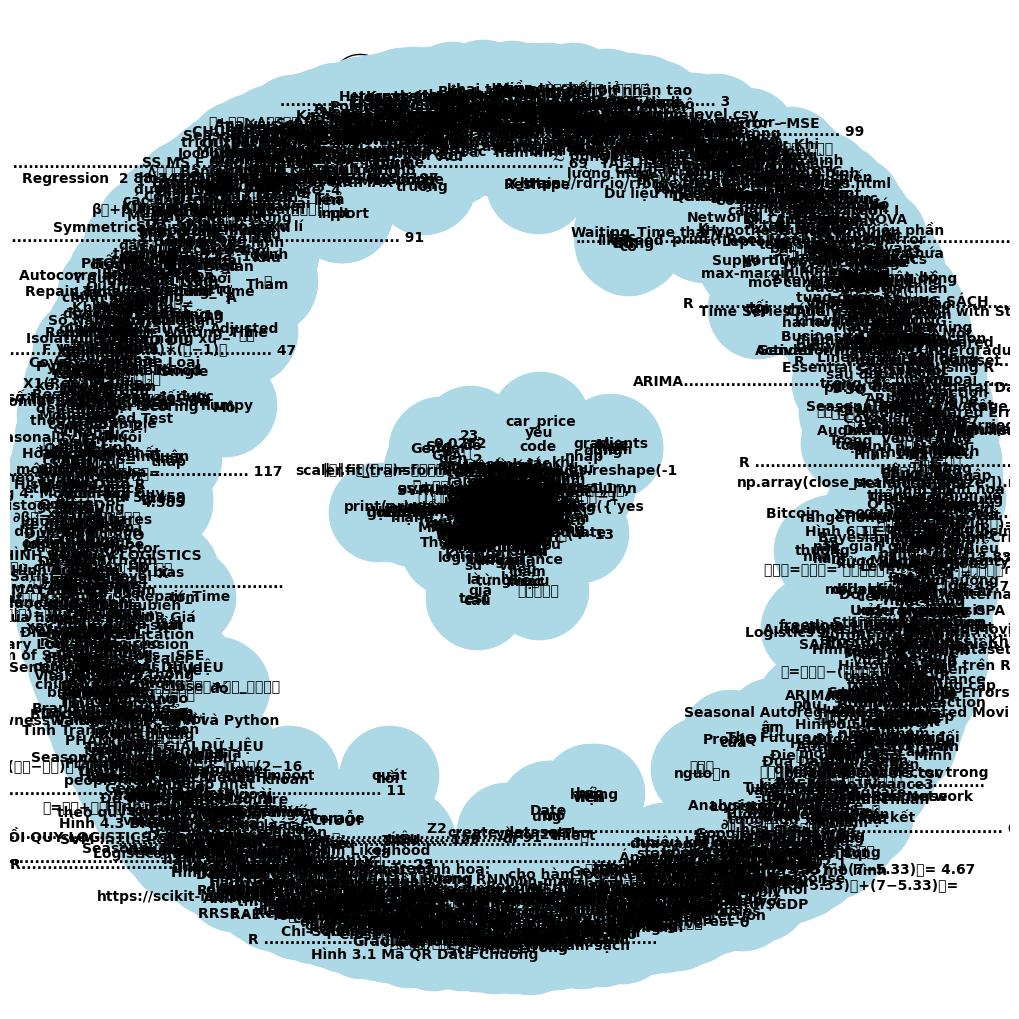

In [43]:
plt.figure(figsize=(10, 10))
nx.draw(graph, with_labels=True, node_color="lightblue", font_size=10, node_size=5000, font_weight="bold")
plt.show()